In [1]:
import geopandas as gp
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = gp.read_file("taxi_zones.shp")

In [3]:
conn = sqlite3.connect('taxi_db_s.db')
c = conn.cursor()

# poor connectivity
c.execute("select DOLocationID from taxi_Details where Store_and_fwd_flag='Y'")

result = list(dict.fromkeys(c))
result.sort()

#locations where connectivity is poor = results

print(len(result))
print(len(df))

170
263


Wall time: 2.09 s


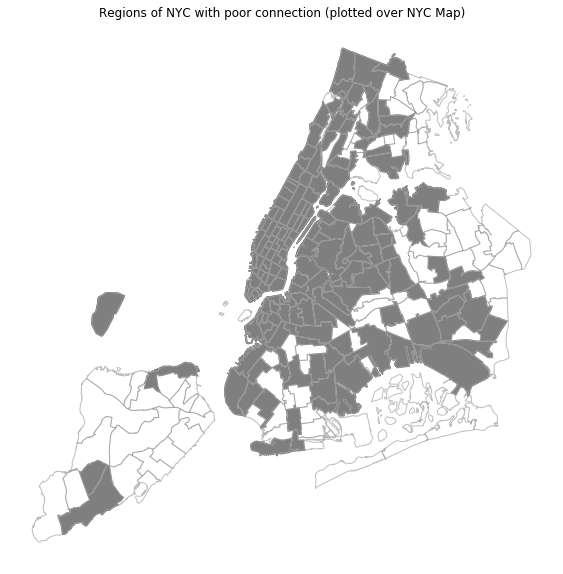

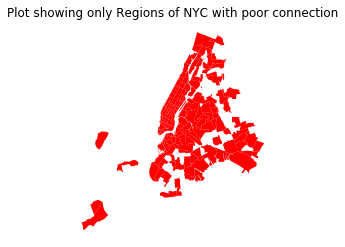

In [13]:
%%time

l = []
min_df = df['LocationID']
for i in range(len(result)):
    for j in range(len(min_df)):
        if result[i][0] == min_df[j]:
            l.append(j)
m_df = df.iloc[l]


ax = m_df.plot(figsize=(10,10),edgecolor='gray', color='Black')
plt.title("Regions of NYC with poor connection (plotted over NYC Map)")
plt.axis('off')
df.plot(figsize = (10,10),ax=ax,edgecolor='gray',color='white', alpha=0.5);
plt.savefig('Insight # 1_1')


m_df.plot(color='Red')
plt.axis('off')
plt.title("Plot showing only Regions of NYC with poor connection")
plt.savefig('Insight # 1')